# New Interface Test - Oxford Paint Spectrum

Try the new magic

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs
%matplotlib inline
print(("Python", sys.version))
print(("hyperspy", hs.__version__))
plt.rcParams['figure.figsize'] = 11, 7

elList = ['C','O','Mg','Al','Si','S','Ca','Ti','Fe','Cu','Ba','Pb']

('Python', '3.5.1 |Anaconda custom (x86_64)| (default, Dec  7 2015, 11:24:55) \n[GCC 4.2.1 (Apple Inc. build 5577)]')
('hyperspy', '0.8.4')


In [2]:
specImg = hs.load("qm-04355-Paint-xs-20kV-map1.rpl")

Loading as Image


In [3]:
specImg

<Image, title: , dimensions: (2048|256, 192)>

In [4]:
specImg.original_metadata

├── byte-order = little-endian
├── data-length = 2
├── data-type = signed
├── depth = 2048
├── height = 192
├── key = value
├── offset = 0
├── record-by = image
├── signal = 
└── width = 256

Define as a spectrum image and set the signal type

In [5]:
specImg = specImg.as_spectrum(0)
specImg.set_signal_type('EDS_SEM')
specImg.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       └── tilt_stage = 0.0
├── General
│   ├── original_filename = qm-04355-Paint-xs-20kV-map1.rpl
│   └── title = 
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = 
    └── signal_type = EDS_SEM

Calibrate the energy axis and the microscope parameters using the calibration of a single pixel spectrum

In [6]:
spec = hs.load('map-sum-spectrum.msa')
spec.set_signal_type('EDS_SEM')
spec.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       ├── live_time = 14386.79037
│       │       └── real_time = 26400.38091
│       ├── beam_current = 0.0
│       ├── beam_energy = 20.0
│       └── tilt_stage = 0.0
├── General
│   ├── date = datetime.date(2011, 5, 19)
│   ├── original_filename = map-sum-spectrum.msa
│   ├── time = datetime.time(5, 7)
│   └── title = Map Sum Spectrum
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = 
    └── signal_type = EDS_SEM

In [7]:
specImg.get_calibration_from(spec)
specImg.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       ├── live_time = 14386.79037
│       │       └── real_time = 26400.38091
│       ├── beam_current = 0.0
│       ├── beam_energy = 20.0
│       └── tilt_stage = 0.0
├── General
│   ├── original_filename = qm-04355-Paint-xs-20kV-map1.rpl
│   └── title = 
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = 
    └── signal_type = EDS_SEM

Calibrate the spatial axes

In [8]:
specImg.axes_manager[-1].name = 'Energy'
specImg.axes_manager['Energy'].units = 'keV'
specImg.axes_manager['Energy'].scale = 0.0100062
specImg.axes_manager['Energy'].offset = -0.2000

In [9]:
specImg.axes_manager.navigation_axes[0].name = 'x'
specImg.axes_manager.navigation_axes[1].name = 'y'
units_name = '${\mu}m$'
specImg.axes_manager['x'].units = units_name
specImg.axes_manager['y'].units = units_name
specImg.axes_manager['x'].scale = 0.10
specImg.axes_manager['y'].scale = 0.10

... and plot

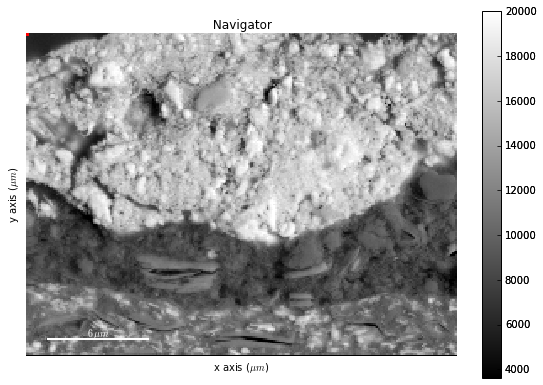

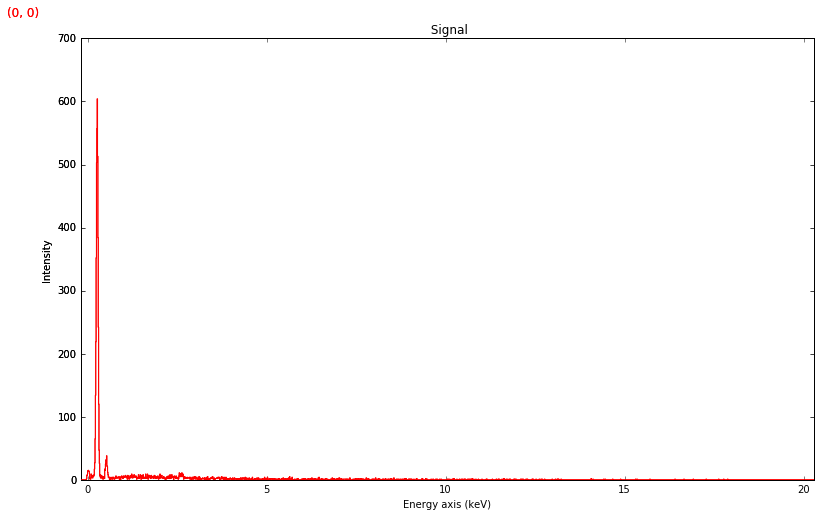

In [10]:
specImg.plot()

In [11]:
specImg.metadata.General.title="Oxford paint sample"
specImg.add_elements(elList)
specImg.add_lines()
specImg.metadata

Al_Ka line added,
Ba_La line added,
C_Ka line added,
Ca_Ka line added,
Cu_Ka line added,
Fe_Ka line added,
Mg_Ka line added,
O_Ka line added,
Pb_Ma line added,
S_Ka line added,
Si_Ka line added,
Ti_Ka line added,


├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       ├── live_time = 14386.79037
│       │       └── real_time = 26400.38091
│       ├── beam_current = 0.0
│       ├── beam_energy = 20.0
│       └── tilt_stage = 0.0
├── General
│   ├── original_filename = qm-04355-Paint-xs-20kV-map1.rpl
│   └── title = Oxford paint sample
├── Sample
│   ├── elements = ['Al', 'Ba', 'C', 'Ca', 'Cu', 'Fe', 'Mg', 'O', 'Pb', 'S', 'Si', 'Ti']
│   └── xray_lines = ['Al_Ka', 'Ba_La', 'C_Ka', 'Ca_Ka', 'Cu_Ka', 'Fe_Ka', 'Mg_Ka', 'O_Ka', 'Pb_Ma', 'S_Ka', 'Si_Ka', 'Ti_Ka']
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = 
    └── signal_type = EDS_SEM

## Apply blind source separation (ICA)

In [12]:
specImg.change_dtype('float')
specImg.decomposition()


Performing decomposition analysis
Undoing data pre-treatments


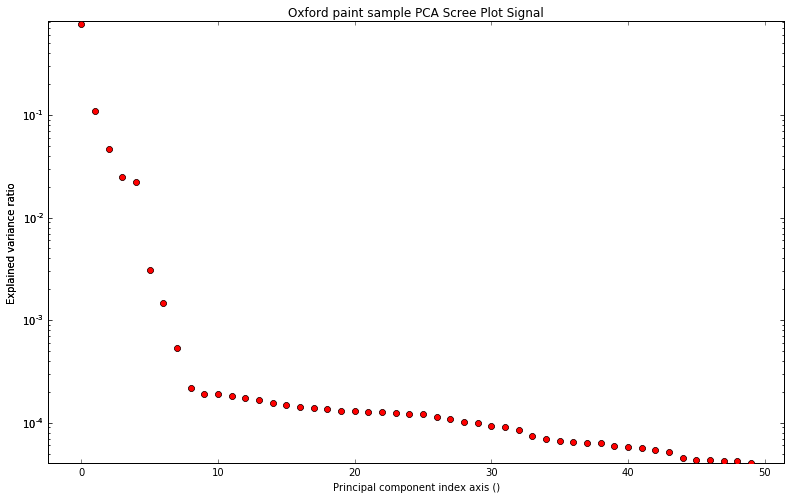

In [13]:
ax = specImg.plot_explained_variance_ratio()

ICA on the first eight components.

In [14]:
specImg.blind_source_separation(8)

IC 0 reversed
IC 1 reversed
IC 4 reversed
IC 6 reversed
IC 7 reversed


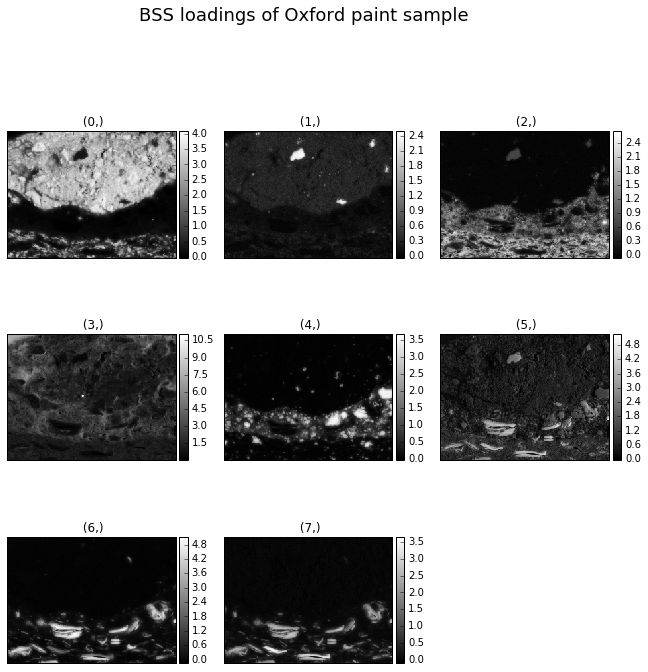

In [15]:
axes = hs.plot.plot_images(specImg.get_bss_loadings(), axes_decor=None)

/Users/jrminter/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/jrminter/anaconda/lib/python3.5/site-packages/hyperspy/signal.py:2591: VisibleDeprecationWarning: Indexing the `Signal` class is deprecated and will be removed in HyperSpy 0.9. Please use `.isig` and/or `.inav` instead.
  VisibleDeprecationWarning)


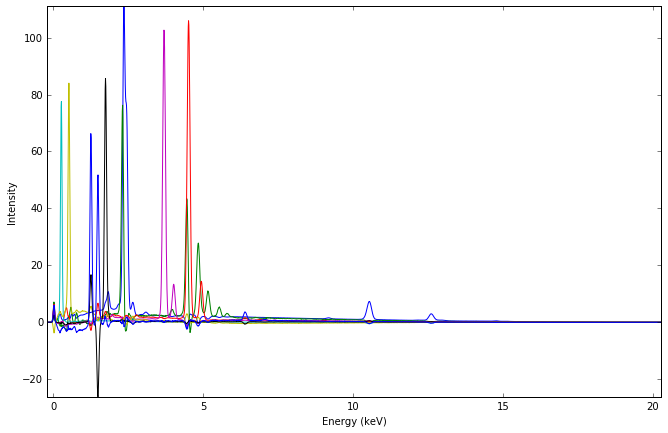

In [16]:
axes = hs.plot.plot_spectra(specImg.get_bss_factors())

In [17]:
fac = specImg.get_bss_factors()
fac

<EDSSEMSpectrum, title: BSS factors of Oxford paint sample, dimensions: (8|2048)>

In [18]:
type(fac)

hyperspy._signals.eds_sem.EDSSEMSpectrum

In [19]:
fac.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       └── tilt_stage = 0.0
├── General
│   └── title = BSS factors of Oxford paint sample
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = 
    └── signal_type = EDS_SEM

In [20]:
fac.add_elements(elList)
fac.metadata.Acquisition_instrument.SEM.beam_energy = 20.0
fac.add_lines()
fac.add_lines(['Pb_La'])
fac.metadata

Al_Ka line added,
Ba_La line added,
C_Ka line added,
Ca_Ka line added,
Cu_Ka line added,
Fe_Ka line added,
Mg_Ka line added,
O_Ka line added,
Pb_Ma line added,
S_Ka line added,
Si_Ka line added,
Ti_Ka line added,
Pb_La line added,


├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── beam_energy = 20.0
│       └── tilt_stage = 0.0
├── General
│   └── title = BSS factors of Oxford paint sample
├── Sample
│   ├── elements = ['Al', 'Ba', 'C', 'Ca', 'Cu', 'Fe', 'Mg', 'O', 'Pb', 'S', 'Si', 'Ti']
│   └── xray_lines = ['Al_Ka', 'Ba_La', 'C_Ka', 'Ca_Ka', 'Cu_Ka', 'Fe_Ka', 'Mg_Ka', 'O_Ka', 'Pb_La', 'Pb_Ma', 'S_Ka', 'Si_Ka', 'Ti_Ka']
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = 
    └── signal_type = EDS_SEM

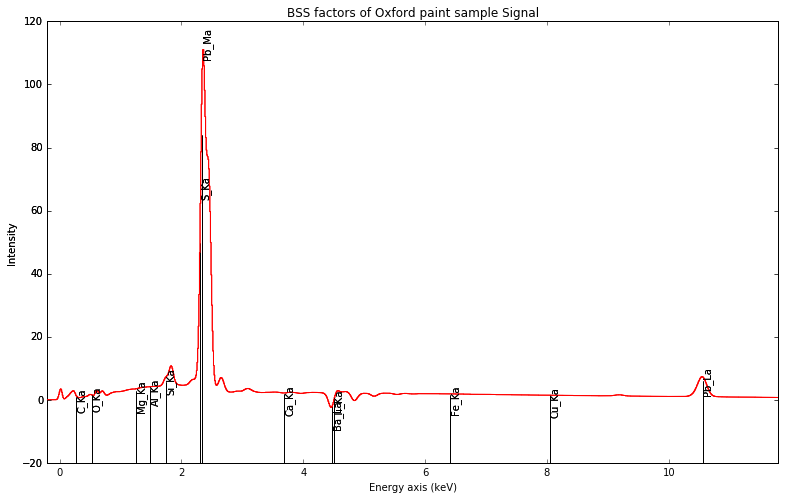

In [21]:
sigTop = 1200
fac.inav[0].isig[0:sigTop].plot(True)

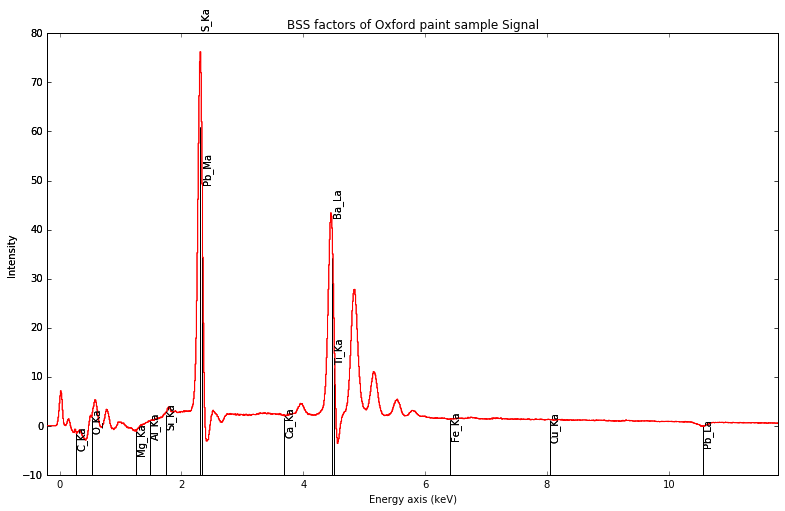

In [22]:
fac.inav[1].isig[0:sigTop].plot(True)

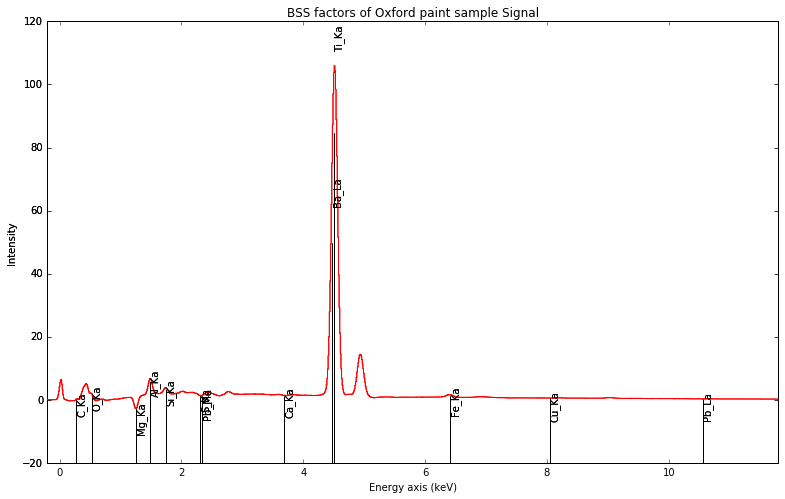

In [23]:
fac.inav[2].isig[0:sigTop].plot(True)

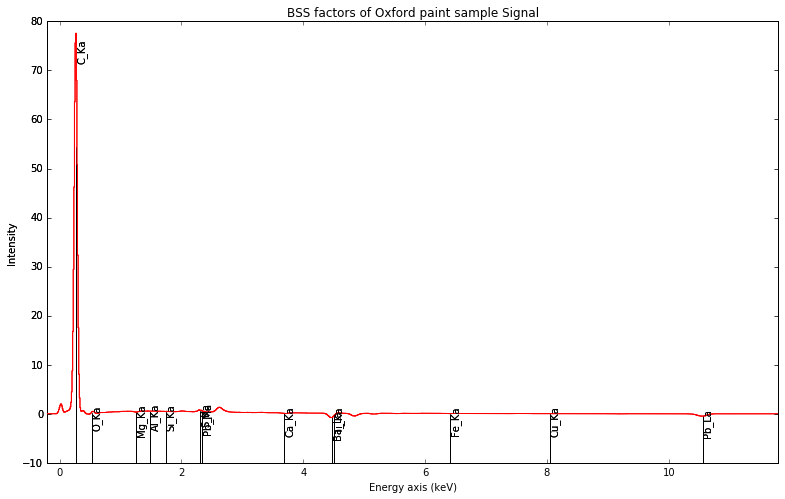

In [24]:
fac.inav[3].isig[0:sigTop].plot(True)

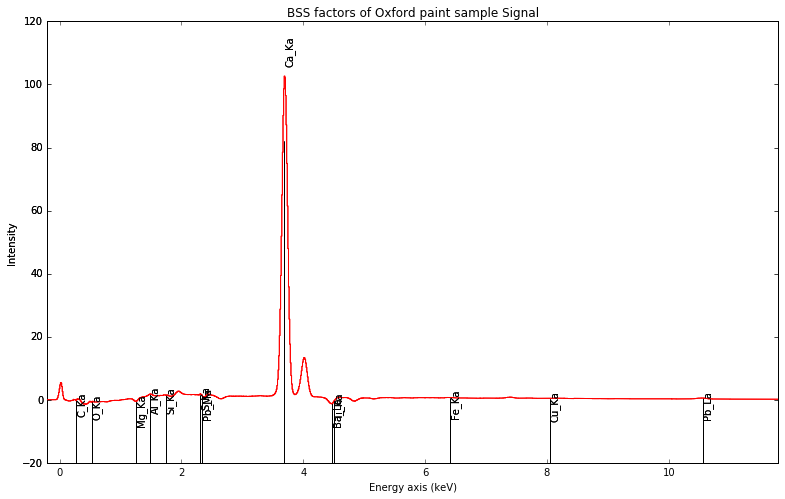

In [25]:
fac.inav[4].isig[0:sigTop].plot(True)

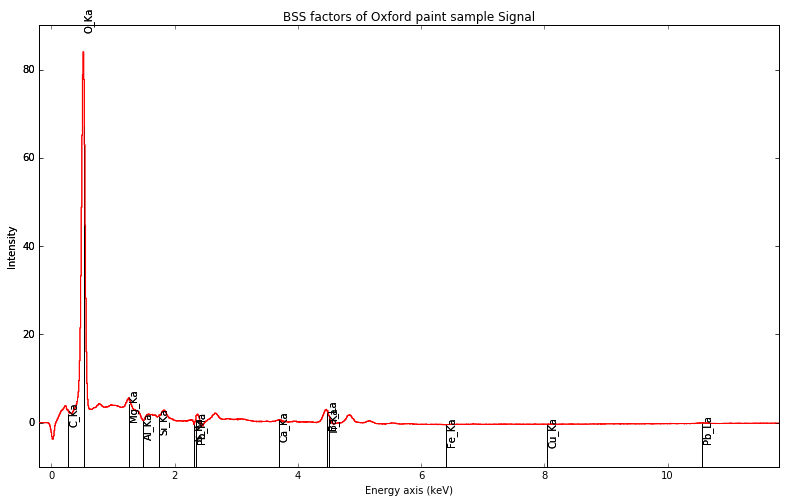

In [26]:
fac.inav[5].isig[0:sigTop].plot(True)

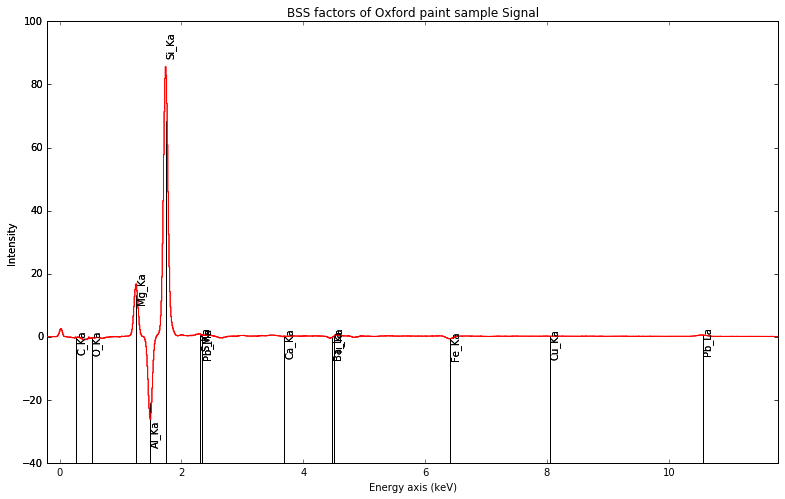

In [27]:
fac.inav[6].isig[0:sigTop].plot(True)

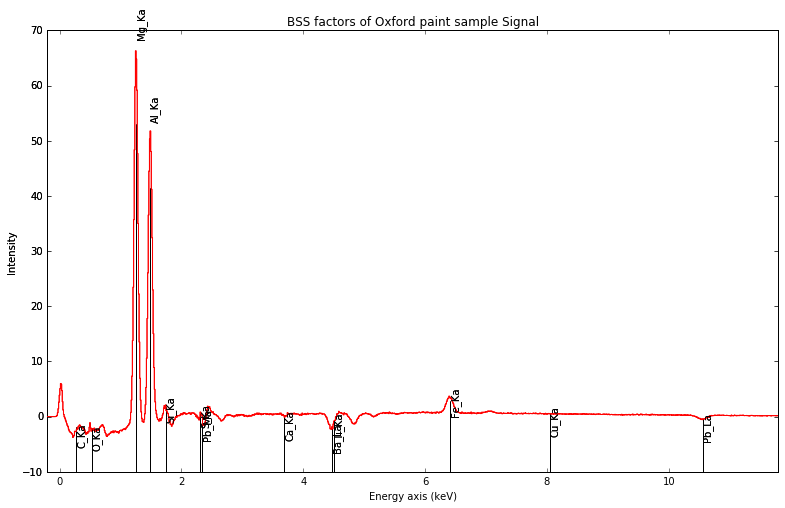

In [28]:
fac.inav[7].isig[0:sigTop].plot(True)

## Making a signals instance from scratch

In [29]:
s = hs.signals.Spectrum(np.arange(8*2048).reshape((8,2048)))
s

<Spectrum, title: , dimensions: (8|2048)>

In [30]:
s.data

array([[    0,     1,     2, ...,  2045,  2046,  2047],
       [ 2048,  2049,  2050, ...,  4093,  4094,  4095],
       [ 4096,  4097,  4098, ...,  6141,  6142,  6143],
       ..., 
       [10240, 10241, 10242, ..., 12285, 12286, 12287],
       [12288, 12289, 12290, ..., 14333, 14334, 14335],
       [14336, 14337, 14338, ..., 16381, 16382, 16383]])

In [31]:
s.inav[0]

<Spectrum, title: , dimensions: (|2048)>

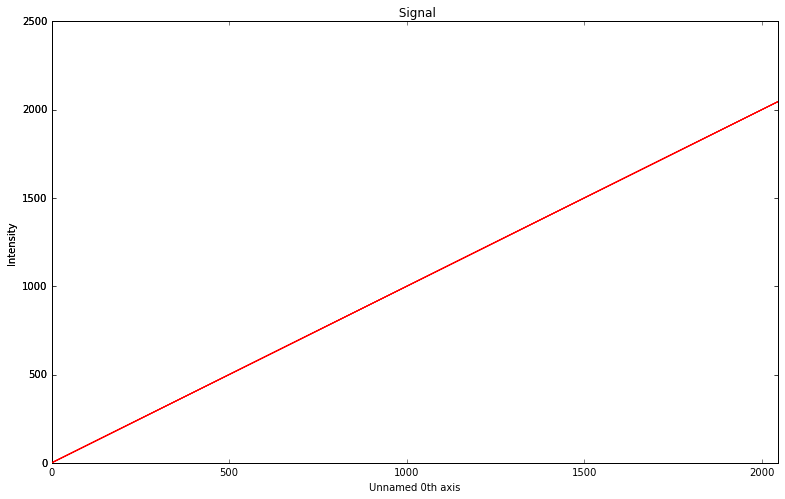

In [32]:
s.inav[0].plot()